# 06. Random Forests
## The Concept: Ensemble Learning 

Imagine you are a doctor trying to diagnose a complex case.
1.  **Decision Tree approach:** You ask one specialist. They might be very smart, but they might also be biased or make a mistake based on specific symptoms (Overfitting).
2.  **Random Forest approach:** You ask **100 specialists**.
    *   They all studied slightly different textbooks (**Bootstrapping**).
    *   They are each allowed to look at only a subset of the patient's symptoms (**Feature Randomness**).
    *   You take the majority vote (**Aggregation**).

This is called **Ensemble Learning**: Combining multiple models (often "weak learners" like deep decision trees) to create a much stronger.
### Key Terms:
*   **Bagging (Bootstrap Aggregating):** Training multiple models in parallel on random subsets of the data.
*   **Bootstrapping:** Sampling data *with replacement*. Some data points might appear multiple times in one tree's training set, others (about 37%) might not appear at all (Out-of-Bag samples).

---

# Why Random Forest? 

A single Decision Tree has **High Variance** (it changes a lot if you change the data slightly). It overfits easily.

Random Forest reduces variance by averaging:
$$ f(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x) $$
Where $B$ is the number of trees (e.g., 100) and $f_b(x)$ is the prediction of the $b$-th tree.

### Two Levels of Randomness:
1.  **Random Data:** Each tree sees a different version of the dataset.
2.  **Random Features:** At each split (node) in the tree, the algorithm considers only a random subset of features (e.g., $\sqrt{Total\_Features}$). This forces trees to be different (decorrelated). If one feature is super powerful, normally all trees would use it at the top. Random Forest forces some trees to *ignore* it and find other patterns.

---

##  Implementation: Classifying Images (Code)

We will use the **Digits** dataset. It contains 1,797 images of size 8x8 pixels.
Total features per image = $8 \times 8 = 64$ pixels.


In [4]:
# step 1  import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# step 2 Load data
digits = load_digits()

# X : The flatteend pixel data (64 features)
X = digits.data 
# y : The label (0-9)
y = digits.target

print(f"Image Data Shape: {digits.images.shape}") 
print(f"Feature Matrix Shape: {X.shape}") 

Image Data Shape: (1797, 8, 8)
Feature Matrix Shape: (1797, 64)


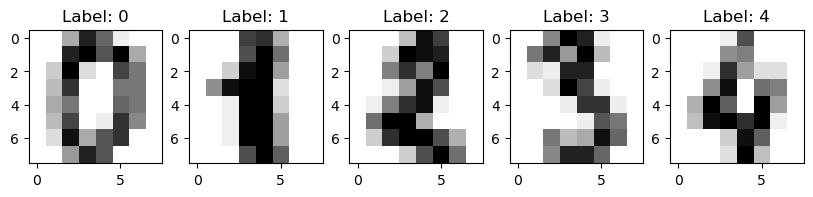

In [10]:
# step 3 : Visualize the data
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()

In [12]:
# step 4 : Train Random Forest
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Model
# n_estimators = 100 means build 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

Accuracy: 0.9722
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



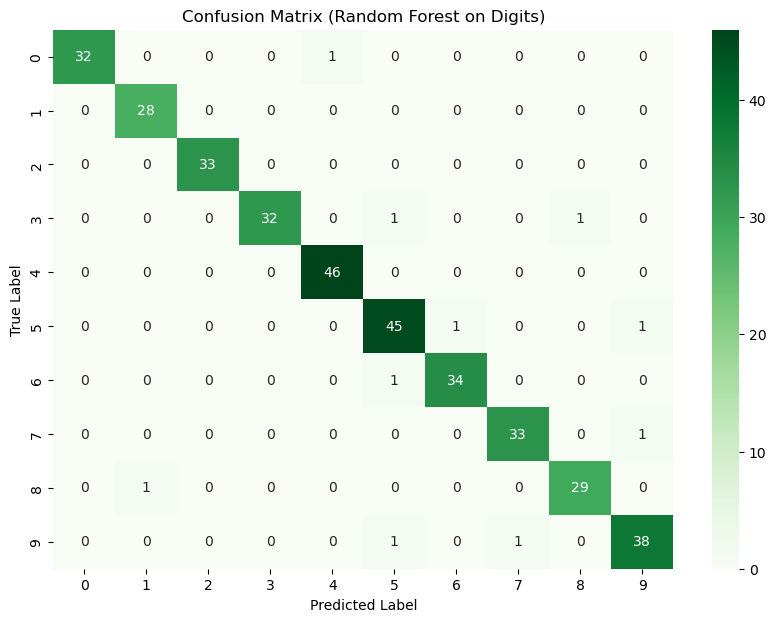

In [14]:
# Step 5 : Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("-" * 30)
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest on Digits)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance (The "Why") 

One of the best features of Random Forest is that it tells us **which features were most important**.
In our case, the features are **pixels**. We can visualize which parts of the image the model looks at to identify the numbers.

This is a precursor to **Saliency Maps** in Deep Learning (Medical Imaging).


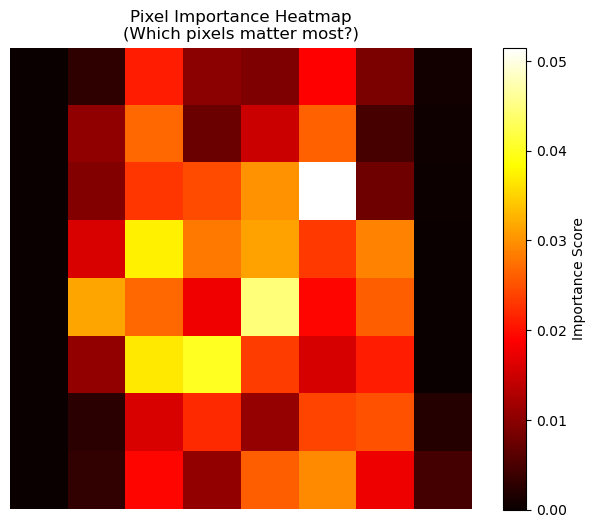

In [17]:
# Get feature importances from the model (array of 64 values)
importances = rf_model.feature_importances_

# Reshape back to 8x8 image format to visualize
importances_image = importances.reshape(8, 8)

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(importances_image, cmap='hot', interpolation='nearest')
plt.colorbar(label='Importance Score')
plt.title("Pixel Importance Heatmap\n(Which pixels matter most?)")
plt.axis('off') # Hide axes for cleaner look
plt.show()